# DATA SCIENCE JOB MARKET ANALYSIS

## 2. Pre-processing

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import KMeans
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import KMeans
from operator import itemgetter

### Now it is time to read the file we have generated.

In [15]:
# Load your dataset
DS_jobs_df = pd.read_csv("DataScience_jobs.csv", index_col=0, low_memory=False)
# Display the number of rows in the dataset
print(len(DS_jobs_df))
DS_jobs_df.head(100)

1009


,roles,companies,locations,experience,skills
0,Data Scientist,VGN Homes,NaN,NaN,"Data Science, Artificial Intelligence, Predict..."
1,Data Scientist,Genpact,Bengaluru,5-10 Yrs,"Statistical Modeling, Machine Learning, Python..."
2,Data Scientist,Capgemini,Bengaluru,4-9 Yrs,"python, data manipulation, numpy, machine lear..."
3,Data Scientist,NaN,NaN,NaN,NaN
4,GCP Data Engineer,NaN,NaN,NaN,NaN
...,...,...,...,...,...
95,Data Scientist,Swift Staffing,"Hyderabad, Chennai, Bengaluru",9-14 Yrs,"Data Science, Chatbot, Aiml, Data, Science"
96,Data Scientist,"Commonwealth Bank of Australia, India",Bengaluru,7-9 Yrs,"Data Science, Gen AI, NLP, Python, ML, Natural..."
97,Data Scientist,IT service company,"Bangalore Rural, Bengaluru",8-12 Yrs,"Maritime, Predictive Modeling, Tensorflow, Pyt..."
98,Data Scientist,LTI Mindtree,"Hybrid - Hyderabad, Pune, Bengaluru",5-10 Yrs,"Data Science., Artificial Intelligence, Natura..."


In [16]:
#lets check if our data have any null values
DS_jobs_df.isna().sum()

roles          6
companies     11
locations     13
experience    18
skills        15
dtype: int64

In [17]:
# Drop rows with missing values
DS_jobs_df.dropna(inplace=True)

In [18]:
#lets check if our data have any dupplicate data
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","roles","locations","skills"])].shape

(29, 5)

In [19]:
# Drop duplicate entries
print("Before dropping duplicates : ",DS_jobs_df.shape)
DS_jobs_df.drop_duplicates(keep="first", inplace=True)
print("After dropping duplicates : ", DS_jobs_df.shape)

Before dropping duplicates :  (990, 5)
After dropping duplicates :  (969, 5)


In [20]:
#lets lower case all the strings to avoid redundancy
DS_jobs_df=DS_jobs_df.apply(lambda x: x.astype(str).str.lower())

In [21]:
# Split locations by comma and clean
DS_jobs_df["locations"] = DS_jobs_df["locations"].apply(lambda x: [loc.strip() for loc in x.split(",")])
DS_jobs_df[15:20]

,roles,companies,locations,experience,skills
21,data scientist,valuelabs,"[hybrid - hyderabad, bengaluru, mumbai (all ar...",7-12 yrs,"generative ai, natural language processing, ma..."
22,ai/ml developer / data scientist (computer vis...,universal ai university,[mumbai],2-5 yrs,"computer vision, machine learning, cloud, prog..."
23,data scientist 1,paypal,[chennai],4-9 yrs,"opex, dispute resolution, excel, diversity and..."
24,data scientist,jll technologies,[gurugram],3-8 yrs,"cloud computing, data analysis, data managemen..."
50,data management - data scientist,ey,[bengaluru],3-4 yrs,"computer science, data analysis, erp, assuranc..."


## 3. Exploratory Data analysis

### 3.1. Location wise Data science jobs


In [22]:
# link of differnt collor pallets: https://matplotlib.org/stable/users/explain/colors/colormaps.html
colors = plt.cm.tab20c.colors[:15]  # You can try 'Accent', 'tab10', or 'Dark2' for variety.


### 3.2 Top Locations with more Data science openings

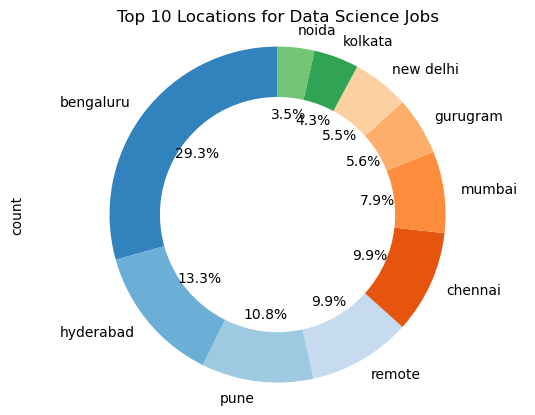

In [23]:
# Visualize top 10 locations
location_counts = DS_jobs_df["locations"].explode().value_counts().head(10)
location_counts.plot.pie(colors=plt.cm.tab20c.colors[:10], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title("Top 10 Locations for Data Science Jobs")
plt.axis("equal")
plt.show()

### 3.3 Companies with more Data science openings

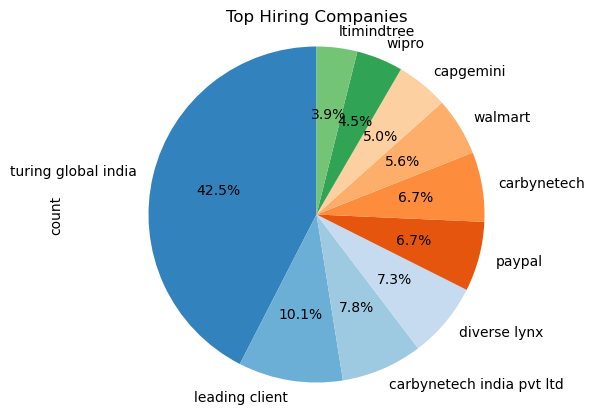

In [24]:
# Top 10 Companies
company_counts = DS_jobs_df["companies"].value_counts().head(10)
company_counts.plot.pie(colors=plt.cm.tab20c.colors[:10], autopct='%1.1f%%', startangle=90)
plt.title("Top Hiring Companies")
plt.axis("equal")
plt.show()

### 3.4 Data Scientist roles in demand

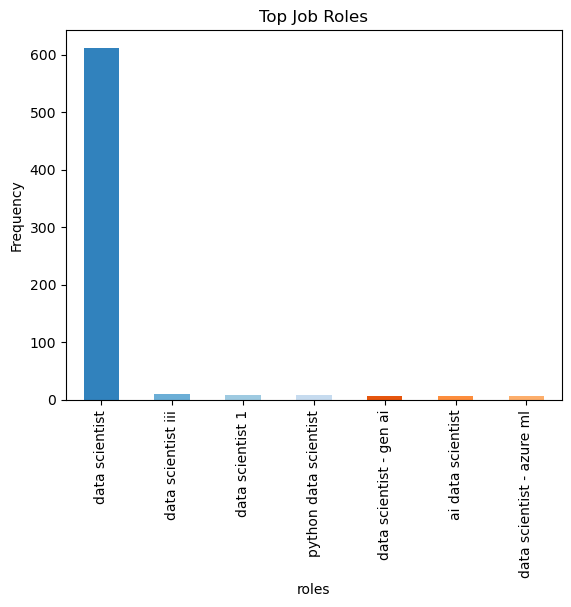

In [29]:
# Job roles distribution
role_counts = DS_jobs_df["roles"].value_counts().head(7)
role_counts.plot(kind='bar', color=plt.cm.tab20c.colors[:7])
plt.title("Top Job Roles")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

### 3.5. Desired Experience for Data science jobs

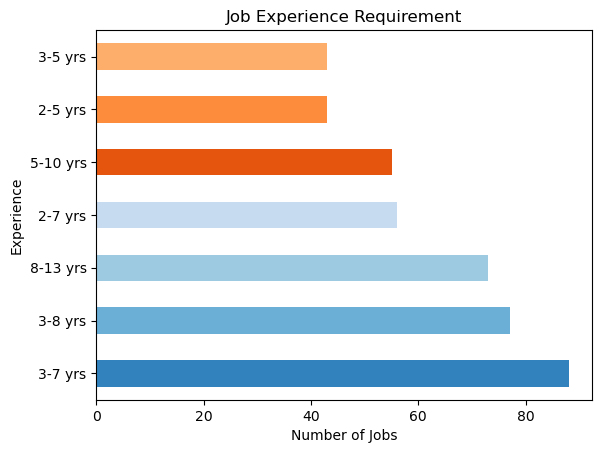

In [44]:
# Experience distribution
experience_counts = DS_jobs_df["experience"].value_counts().head(7)
experience_counts.plot(kind='barh', color=plt.cm.tab20c.colors[:7])
#plt.figure(figsize=(12, 6))
plt.xlabel("Number of Jobs")
plt.ylabel("Experience")
plt.title("Job Experience Requirement")
plt.show()

### 3.6. Skills required for a Data science job

skills
machine learning               598
data science                   309
python                         281
data analysis                  212
sql                            202
analytical                     183
natural language processing    131
data                           130
computer science               130
artificial intelligence        119
data mining                    114
deep learning                  103
analytics                      101
machine                         79
data visualization              73
gcp                             70
data scientist                  68
computer vision                 59
neural networks                 59
predictive modeling             59
Name: count, dtype: int64


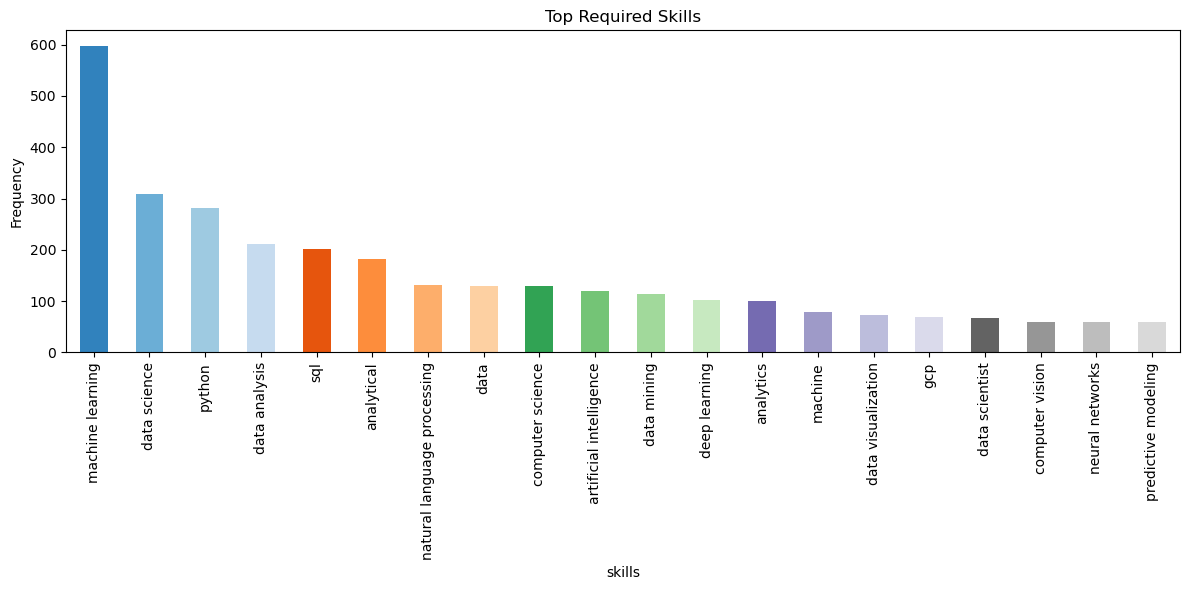

In [42]:
# Skills analysis
skills_series = DS_jobs_df['skills'].str.split(',').explode().str.strip()
top_skills = skills_series.value_counts().head(20)
# Top 7 most required skills in jab market.
print(top_skills)
# Plotting the top skills
plt.figure(figsize=(12, 6))  
top_skills.plot(kind='bar', color=plt.cm.tab20c.colors[:20])
plt.title("Top Required Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [47]:
# Convert skills into DataFrame for further analysis
skl_df = skills_series.value_counts().reset_index()
skl_df.columns = ["skills", "count"]
skl_df.head(10)

,skills,count
0,machine learning,598
1,data science,309
2,python,281
3,data analysis,212
4,sql,202
5,analytical,183
6,natural language processing,131
7,data,130
8,computer science,130
9,artificial intelligence,119


In [31]:
# Extract domain-specific skill clusters
datascience = {
    'statistics': skl_df["count"][skl_df['skills'].str.contains('stat')].sum(),
    'machine_learning': skl_df["count"][skl_df['skills'].str.contains('machine |^ml')].sum(),
    'data_analysis': skl_df["count"][skl_df['skills'].str.contains('data ana')].sum(),
    'data_mining': skl_df["count"][skl_df['skills'].str.contains('mining')].sum(),
    'nlp': skl_df["count"][skl_df['skills'].str.contains('nlp|natural')].sum(),
    'computer_vision': skl_df["count"][skl_df['skills'].str.contains('computer vision')].sum(),
    'deep_learning': skl_df["count"][skl_df['skills'].str.contains('deep learning')].sum(),
    'big_data': skl_df["count"][skl_df['skills'].str.contains('big')].sum()
}


### 3.6.1. Mandatory Skills

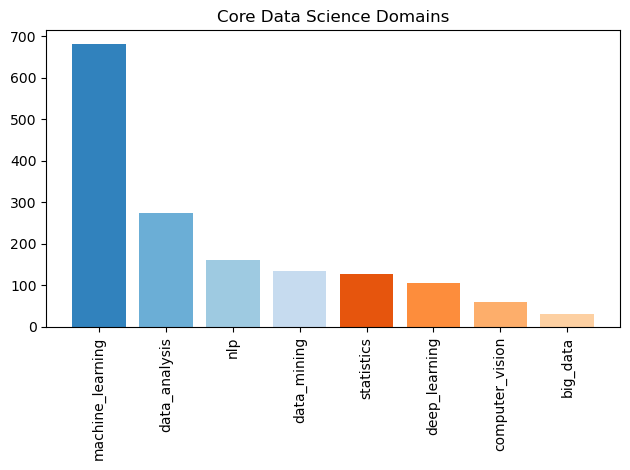

In [46]:
# Plot domain skills
datascience = dict(sorted(datascience.items(), key=itemgetter(1), reverse=True))
plt.bar(datascience.keys(), datascience.values(), color=plt.cm.tab20c.colors[:len(datascience)])
#plt.figure(figsize=(12, 6))
plt.title("Core Data Science Domains")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3.6.3. Required Programming Languages

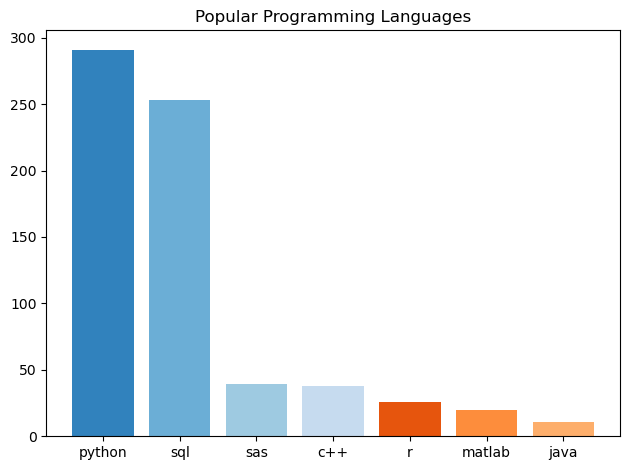

In [35]:
# Programming languages
languages = {
    'python': skl_df["count"][skl_df['skills'].str.contains('python')].sum(),
    'r': skl_df["count"][skl_df['skills'].str.contains('^r$')].sum(),
    'matlab': skl_df["count"][skl_df['skills'].str.contains('matlab')].sum(),
    'java': skl_df["count"][skl_df['skills'].str.contains('java$')].sum(),
    'c++': skl_df["count"][skl_df['skills'].str.contains('c\+')].sum(),
    'sas': skl_df["count"][skl_df['skills'].str.contains('sas')].sum(),
    'sql': skl_df["count"][skl_df['skills'].str.contains('sql') & ~skl_df['skills'].str.contains('no')].sum()
}
languages = dict(sorted(languages.items(), key=itemgetter(1), reverse=True))
plt.bar(languages.keys(), languages.values(), color=plt.cm.tab20c.colors[:len(languages)])
plt.title("Popular Programming Languages")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 3.7 Deep Learning Skills Requirement

1. **Deep learning Frameworks**
2. **Clouds for Data Science**
3. **Big data technologies for Data Science**
4. **Data Visualization tools**

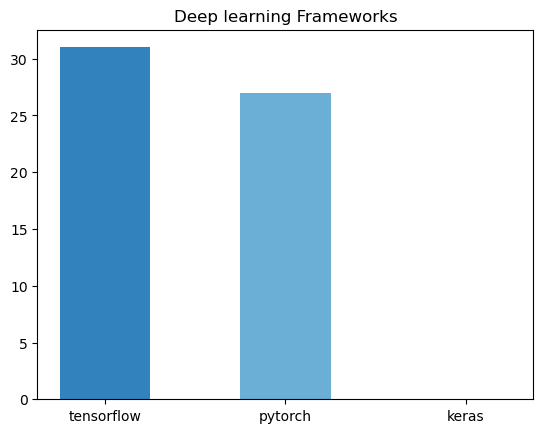

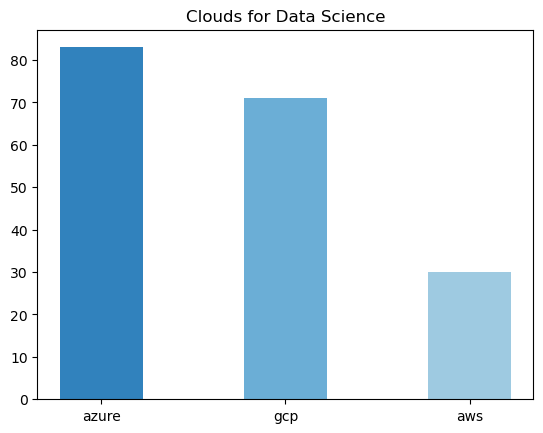

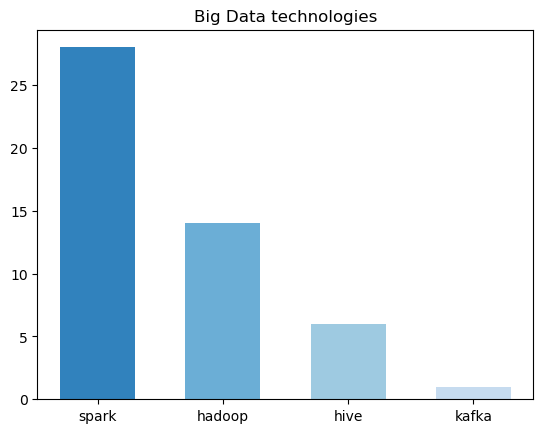

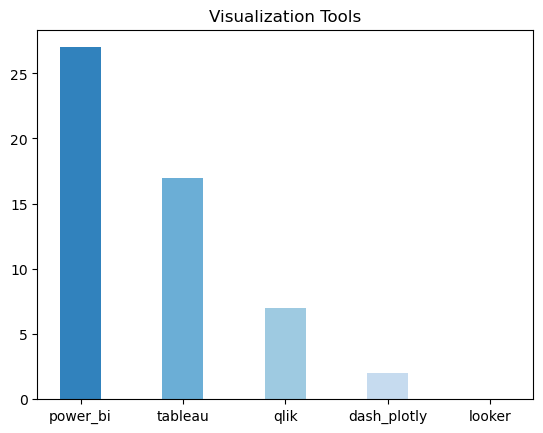

In [54]:
# Framework selection
frameworks={}
frameworks['tensorflow']=skl_df["count"][skl_df['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=skl_df["count"][skl_df['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=skl_df["count"][skl_df['skills'].str.contains('torch', regex=True)].sum()

# Sort
frameworks=dict(sorted(frameworks.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(frameworks.keys(),frameworks.values(),color=colors,width=.5)
plt.xticks(rotation=0)
plt.title("Deep learning Frameworks")
plt.show()

#Providers selection
cloud={}
cloud['aws']=skl_df["count"][skl_df['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=skl_df["count"][skl_df['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=skl_df["count"][skl_df['skills'].str.contains('gcp')].sum()

# Sort
cloud=dict(sorted(cloud.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(cloud.keys(),cloud.values(),color=colors,width=.45)
plt.xticks(rotation=0)
plt.title("Clouds for Data Science")
plt.show()

# Tech Selection
bigdata={}
bigdata["spark"]=skl_df["count"][skl_df['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=skl_df["count"][skl_df['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=skl_df["count"][skl_df['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=skl_df["count"][skl_df['skills'].str.contains('kafka', regex=True)].sum()

# Sort
bigdata=dict(sorted(bigdata.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(bigdata.keys(),bigdata.values(),color=colors,width=0.6)
plt.xticks(rotation=0)
plt.title("Big Data technologies")
plt.show()

# tools selection
tools={}
tools["tableau"]=skl_df["count"][skl_df['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=skl_df["count"][skl_df['skills'].str.contains('power bi', regex=True)].sum()
tools["looker"] = skl_df["count"][skl_df['skills'].str.contains('looker', regex=True)].sum()
tools["qlik"] = skl_df["count"][skl_df['skills'].str.contains('qlik', regex=True)].sum()
tools["dash_plotly"] = skl_df["count"][skl_df['skills'].str.contains('plotly|dash', regex=True)].sum()

# Sort
tools=dict(sorted(tools.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(tools.keys(),tools.values(),color=colors,width=(0.4))
plt.xticks(rotation=0)
plt.title("Visualization Tools")
plt.show()

### Let's now cluster the locations of the jobs using dimensionality reduction techniques

**Description:**

In this analysis, we aim to cluster job postings based on their **locations** by applying **dimensionality reduction** and **clustering** techniques.

**Steps:**

1. **Data Preparation:**  
   - Start with a sample DataFrame containing roles, companies, locations, experience, and skills.
   - Clean the `locations` column by removing square brackets.

2. **Vectorization:**  
   - Convert the cleaned location strings into numerical feature vectors using `CountVectorizer`.

3. **Dimensionality Reduction:**  
   - Apply **PCA** (Principal Component Analysis) to reduce the location vectors to 2 dimensions.
   - Apply **UMAP** (Uniform Manifold Approximation and Projection) for a nonlinear 2D embedding.

4. **Clustering:**  
   - Perform **KMeans clustering** on both the PCA and UMAP embeddings.

In [36]:
# Parse experience values robustly
def parse_experience(exp):
    try:
        exp = exp.lower().strip()
        if "-" in exp:
            years = exp.replace("yrs", "").replace("years", "").strip().split("-")
            return (float(years[0].strip()) + float(years[1].strip())) / 2
        elif "yr" in exp or "yrs" in exp or "year" in exp:
            return float(exp.replace("years", "").replace("yrs", "").replace("yr", "").strip())
        else:
            return None
    except:
        return None

DS_jobs_df["experience_parsed"] = DS_jobs_df["experience"].apply(parse_experience)

In [37]:
# UMAP + Clustering based on location vectorization
DS_jobs_df["locations_clean"] = DS_jobs_df["locations"].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))
vectorizer = CountVectorizer()
location_vectors = vectorizer.fit_transform(DS_jobs_df['locations_clean']).toarray()

In [38]:
# Dimensionality reduction
pca = PCA(n_components=2)
location_pca = pca.fit_transform(location_vectors)
reducer = umap.UMAP(n_components=2, random_state=42)
location_umap = reducer.fit_transform(location_vectors)

c:\Users\ommair\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [39]:
# Clustering
kmeans_pca = KMeans(n_clusters=3, random_state=42).fit(location_pca)
kmeans_umap = KMeans(n_clusters=3, random_state=42).fit(location_umap)

c:\Users\ommair\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ommair\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\ommair\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ommair\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

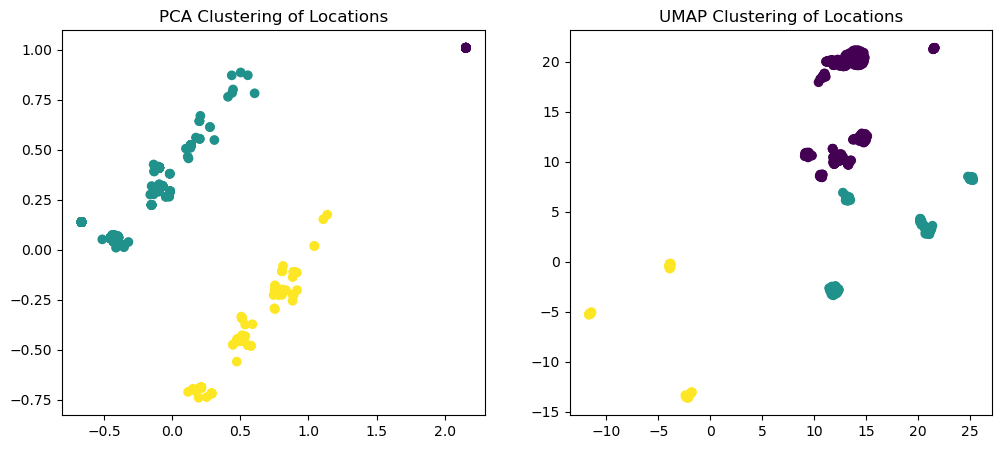

In [40]:
# Plot clusters
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(location_pca[:, 0], location_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
axs[0].set_title('PCA Clustering of Locations')
axs[1].scatter(location_umap[:, 0], location_umap[:, 1], c=kmeans_umap.labels_, cmap='viridis')
axs[1].set_title('UMAP Clustering of Locations')
plt.show()

### Conclusion

Key Conclusions from the Analysis:
----------------------------------
1. **Top Cities**: Bangalore, Hyderabad, and Pune are the most active hubs for data science hiring.
2. **Top Companies**: A few firms dominate the job market, with recurring listings, suggesting bulk hiring or staffing firms.
3. **In-demand Roles**: Core titles like 'Data Scientist', 'Machine Learning Engineer', and 'Data Analyst' top the charts.
4. **Experience Demand**: Most roles require between 2 to 6 years of experience, indicating a focus on mid-level professionals.
5. **Popular Skills**: Python, SQL, Machine Learning, and Deep Learning are the most frequently listed technical skills.
6. **Tooling and Ecosystem**: Tools like Tableau and Power BI, and frameworks like TensorFlow and PyTorch are sought after.
7. **Cloud Platforms**: AWS dominates among cloud service mentions, with Azure and GCP also featured.
8. **Location Similarity**: Clustering analysis indicates regional job market similarities that could inform relocation decisions.

This analysis can help job seekers prioritize skill development and location targeting, while recruiters can align offerings with current trends.

